第2题  词袋模型向量化任意文本

In [71]:
from sklearn.feature_extraction.text import CountVectorizer  
corpus=["I come to China to travel", 
    "This is a car polupar in China",          
    "I love tea and Apple ",   
    "The work is to write some papers in science"] 
vectorizer=CountVectorizer()
print("词频统计：")
#输出4个文本的词频统计：左边的括号中的两个数字分别为(文本序号，词序号)，右边数字为频次
print(vectorizer.fit_transform(corpus))
print("\n词袋模型：")
print(vectorizer.fit_transform(corpus).toarray())


词频统计：
  (0, 4)	1
  (0, 15)	2
  (0, 3)	1
  (0, 16)	1
  (1, 3)	1
  (1, 14)	1
  (1, 6)	1
  (1, 2)	1
  (1, 9)	1
  (1, 5)	1
  (2, 7)	1
  (2, 12)	1
  (2, 0)	1
  (2, 1)	1
  (3, 15)	1
  (3, 6)	1
  (3, 5)	1
  (3, 13)	1
  (3, 17)	1
  (3, 18)	1
  (3, 11)	1
  (3, 8)	1
  (3, 10)	1

词袋模型：
[[0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 2 1 0 0]
 [0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0]
 [1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1]]


第3题 tfidf方法对20newsgroups做向量化，输出第一个文本的 结果向量

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import _twenty_newsgroups
from sklearn.model_selection import train_test_split
newsgroups=_twenty_newsgroups.fetch_20newsgroups(data_home='./',subset='all')
# print(len(newsgroups['data']))
x_train,x_test,y_train,y_test=train_test_split(newsgroups['data'][1:5000],newsgroups['target'][1:5000],test_size=0.3)
# print(x_train[0],y_train[0])
# print(newsgroups['DESCR'])
tf=TfidfVectorizer()
tv_fit=tf.fit_transform(x_train)
tv_test=tf.transform(x_test)
print(tv_test.toarray()[0])

[0. 0. 0. ... 0. 0. 0.]


第4题 朴素贝叶斯对文本进行分类

In [73]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(tv_fit.toarray(),y_train)
print('训练集准确度：')
print(gnb.score(tv_fit.toarray(),y_train))
print('测试集准确度：')
print(gnb.score(tv_test.toarray(),y_test))

训练集准确度：
1.0
测试集准确度：
0.7473333333333333


第5题 选取音频进行傅里叶变换

_wave_params(nchannels=2, sampwidth=2, framerate=44100, nframes=335232, comptype='NONE', compname='not compressed')


C:\Users\cyq\AppData\Local\Temp\ipykernel_6676\2185369736.py:23: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  waveData = np.fromstring(strData,dtype=np.int32)
C:\Users\cyq\AppData\Local\Temp\ipykernel_6676\2185369736.py:24: RuntimeWarning: divide by zero encountered in divide
  waveData = waveData*1.0/(max(abs(waveData)))  # 幅值归一化
C:\Users\cyq\AppData\Local\Temp\ipykernel_6676\2185369736.py:24: RuntimeWarning: invalid value encountered in divide
  waveData = waveData*1.0/(max(abs(waveData)))  # 幅值归一化


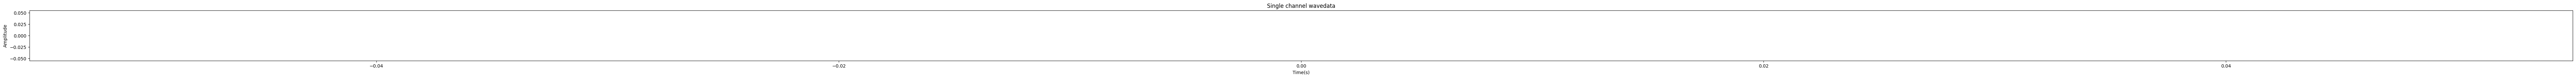

In [2]:
import wave
import os
import numpy as np
from pydub import AudioSegment
import matplotlib.pylab as plt
# %matplotlib inline


wav_file = './now.wav'
if not os.path.exists(wav_file):
    f=open(wav_file,'w')
    f.close()
# song = AudioSegment.from_mp3('./keyboard_sound.mp3')
song=AudioSegment.from_file(r'D:\\wuwen\\ECNU\\大二上\\数据科学与工程导论\\homework\\week8\\unite14\\keyboard_sound.mp3',format='mp3')
song.export(wav_file , format="wav")

with wave.open(wav_file ,'rb') as f:
    params = f.getparams()
    print(params)
    nchannels, sampwidth, framerate, nframes = params[:4]
    nframes = int(nframes/80)
    strData = f.readframes(nframes)
    waveData = np.fromstring(strData,dtype=np.int32)
    waveData = waveData*1.0/(max(abs(waveData)))  # 幅值归一化
    # plot the wave
    time = np.arange(0,nframes)*(1.0 / framerate)
    plt.figure(figsize=(100,2))
    plt.plot(time,waveData)
    plt.xlabel("Time(s)")
    plt.ylabel("Amplitude")
    plt.title("Single channel wavedata")



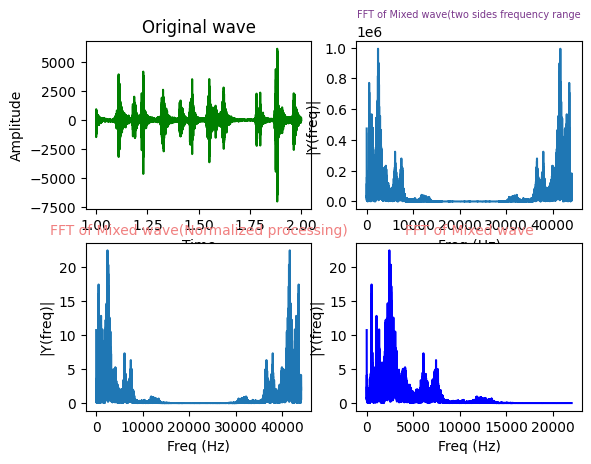

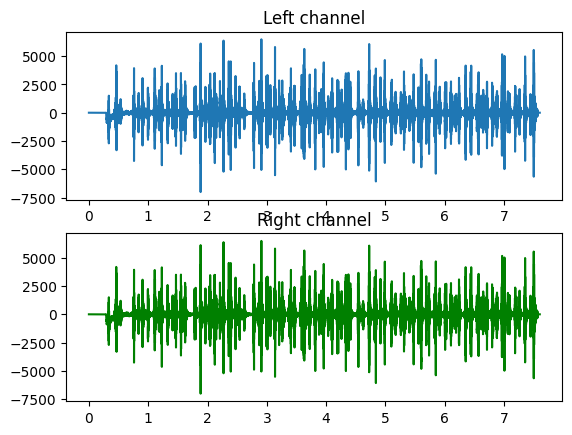

In [4]:
import wave
from scipy.fftpack import fft,ifft
import matplotlib.pyplot as plt
import numpy as np

def wave_read(path):
    '''#打开wav文件 ，open返回一个的是一个Wave_read类的实例，
    通过调用它的方法读取WAV文件的格式和数据'''
    f=wave.open(path,"rb")
    #一次性返回所有的WAV文件的格式信息，它返回的是一个组元(tuple)：声道数, 量化位数（byte单位）,
    # 采
    # 样频率, 采样点数, 压缩类型, 压缩类型的描述。wave模块只支持非压缩的数据，因此可以忽略最后两个信息'''
    params=f.getparams()
    # 读取波形数据
    nchannels, sampwidth, framerate, nframes=params[:4]
    # 读取声音数据，传递一个参数指定需要读取的长度（以取样点为单位）
    str_date=f.readframes(nframes)
    f.close()
    # 需要根据声道数和量化单位，将读取的二进制数据转换为一个可以计算的数组
    wave_date=np.frombuffer(str_date,dtype=np.short)
    # 将wave_data数组改为2列，行数自动匹配。在修改shape的属性时，需使得数组的总长度不变。
    wave_date.shape=-1,2
    # 转置数据,使成为2行的数据，方便下面时间匹配
    wave_date=wave_date.T
    #通过取样点数和取样频率计算出每个取样的时间,也就是周期T=采样单数/采样率
    time=np.arange(0,nframes)* (1.0/framerate)
    return wave_date,time

def date_fft(data,time,start,end):
    #wavedata, wavetime = wave_read(path)
    t=[]
    y=[]
    for i in range(time.size):
        if ((time[i]>=start) & (time[i]<=end)):
            t=np.append(t,time[i])
            y=np.append(y,data[0][i])#取左声道
    n=len(t)# 信号长度
    yy=fft(y)
    yf=abs(yy)#取绝对值
    yf1=abs(fft(y))/n#归一化处理
    yf2=yf1[range(int(n/2))]##由于对称性，只取一半区间

    xf=np.arange(len(y))#频率
    xf1=xf
    xf2=xf[range(int(n/2))]#取一半区间

    #显示原始序列
    plt.figure()
    plt.subplot(221)
    plt.plot(t,y,'g')
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.title("Original wave")

    #显示取绝对值后的序列
    plt.subplot(222)
    plt.plot(xf, yf)
    plt.xlabel("Freq (Hz)")
    plt.ylabel("|Y(freq)|")
    plt.title("FFT of Mixed wave(two sides frequency range",fontsize=7,color='#7A378B')
    # 注意这里的颜色可以查询颜色代码表

    #显示归一化处理后双边序列
    plt.subplot(223)
    plt.plot(xf1, yf1)
    # 注意这里的颜色可以查询颜色代码表
    plt.xlabel("Freq (Hz)")
    plt.ylabel("|Y(freq)|")
    plt.title('FFT of Mixed wave(Normalized processing)',fontsize=10,color='#F08080')

    # 显示归一化处理后单边序列
    plt.subplot(224)
    plt.plot(xf2, yf2, 'b')
    # 注意这里的颜色可以查询颜色代码表
    plt.xlabel("Freq (Hz)")
    plt.ylabel("|Y(freq)|")
    plt.title('FFT of Mixed wave',fontsize=10,color='#F08080')

    plt.show()


wave_date, time=wave_read("./now.wav")
date_fft(wave_date,time,1,2)

#左右声道的显示
plt.figure()
plt.subplot(211)
plt.plot(time, wave_date[0])
plt.title("Left channel")
plt.subplot(212)
plt.plot(time, wave_date[1], c="g")
plt.title("Right channel")
plt.show()

